In [1]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Homogeneous Coordinates

The typical way to represent points on a 2D surface is with Cartesian coordinates.  To do this, you must select an origin that will be labeled with (0, 0).  Then all other points are specified by a vector that represents their displacement from the origin.  This vector can be written using two value (x, y) where x is the displacement on the x axis and y is the displacement on the y-axis.

In Computer Vision (and Computer Graphics) it is typically more useful to represent points in a different way.  Homogeneous coordinates on a 2D projective system are represented using three values: [x:y:w].  Homogeneous coordinates can be converted to Cartesian using (x/w, y/w).  Each Cartesian coordinate has an infinite number of analogous homogeneous coordinates since homogeneous coordinates can be scaled without changing the point.

For example, [6:8:2] is equivalent to [3:4:1] is equivalent to [12:16,4].  The plots below show the Cartesian coordainte (3,4) and the set of corresponding homogeneous coordinates.

In [115]:
x, y = 3, 4

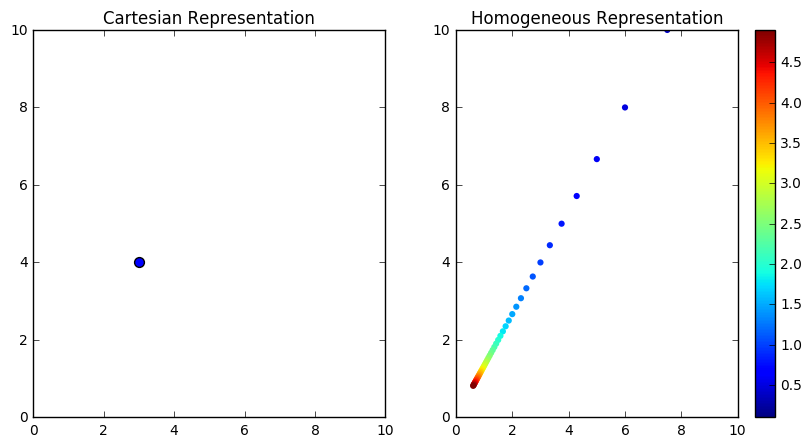

In [116]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, s=50)
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.title("Cartesian Representation")

ws = np.arange(.1, 5, .1)
xs = x / ws
ys = y / ws
plt.subplot(1, 2, 2)
plt.scatter(xs, ys, c = ws, lw=0.0)
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.colorbar()
plt.title("Homogeneous Representation")

plt.show()

## Homogeneous Lines

Now let's consider how we represent lines in both Cartesian and Homogeneous coordinates.  For lines in Cartesian space, we typically write

$$ y=\beta_1x+ \beta_0 $$

but an alternative representation is 

$$ ax + by + c = 0 $$

where $ \beta_1 = \frac{-a}{b} $ and $ \beta_0 = \frac{-c}{b} $

Notice that multiplying the second line equation by a constant does not change the line:

$$ kax + kby + kc = ax + by + c $$

This invariance to scale is strikingly similar to the scale invariance of homgeneous coordinates.  In fact, just as we represent a line with two values $(\beta_1,\beta_0)$ in the Cartesian system, we can write a line three values $[a:b:c]$ in the homgeneous system.

In the Homgeneous coordinates, there is actually no distinction between lines and points.  For evidence of this, consider the equivalent ways of representing the Cartesian point (3,4) as shown in the plots above.  These equivalent representations form a line in Homogeneous coordinates.

The diagrams below who a line in Cartesian coordinates and the same line in Homogeneous coordinates.




In [251]:
b_1 = 1
b_0 = -2

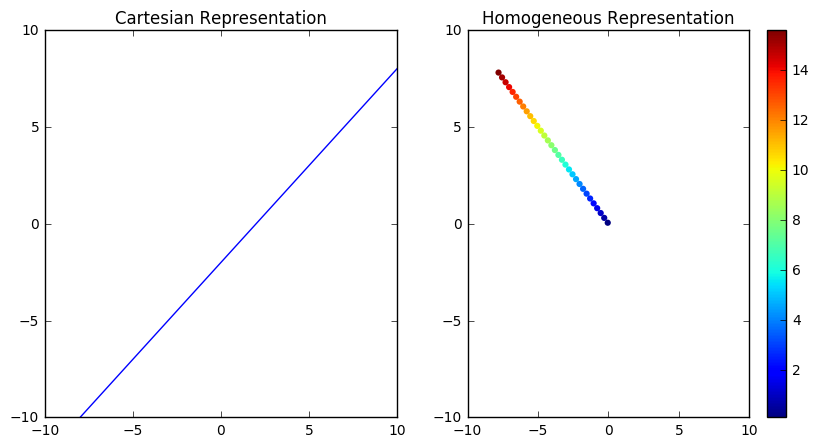

In [252]:
fig = plt.figure(figsize=(10, 5))
xs = np.arange(-10, 11)
ys = b_1 * xs + b_0
plt.subplot(1, 2, 1)
plt.plot(xs, ys)
plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.title("Cartesian Representation")

c = np.arange(.1, 5, .1)

xs = np.array([-10, 10])
ys =b_1 * xs + b_0
plt.subplot(1, 2, 2)
c = np.arange(.1, 16, .5)
b = -c / b_0
a = -b_1 * b
plt.scatter(a,b,c=c, lw=0.0)
plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.colorbar()
plt.title("Homogeneous Representation")

plt.show()

## Using Homogeneous Points and Lines

### Points on a line

If a point [x:y:w] is on the line [a:b:c] then $[x:y:w]^{T}[a:b:c] = 0$

Consider the line (as above):

$$y = x - 2 \implies \frac{-1}{2}x + \frac{1}{2}y + 1 = 0$$

Let's test some points to see if they are on this line.

In [289]:
on_line = np.array([(0, -2, 1), (2, 0, 1), (4, 2, 1)])
off_line = np.array([(5, 6, 1), (3, -4, 1)])

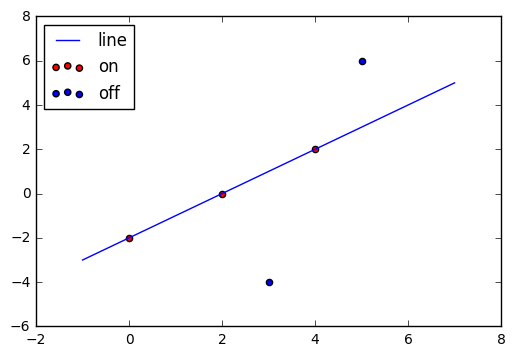

In [290]:
plt.scatter(on_line[:,0], on_line[:,1], c="red")
plt.scatter(off_line[:,0], off_line[:,1], c="blue")
xs = np.array([-1, 7])
ys = xs - 2
plt.plot(xs, ys)
plt.legend(["line", "on", "off"], loc="topleft")
plt.show()

In [291]:
line = np.array([-1./2, 1./2, 1])
print("~~ Points on Line ~~")
for p in on_line:
    print(p, " is on line: ", np.dot(p, line) == 0.0)
    
print("\n~~ Points not on Line ~~")
for p in off_line:
    print(p, " is on line: ", np.dot(p, line) == 0.0)

~~ Points on Line ~~
[ 0 -2  1]  is on line:  True
[2 0 1]  is on line:  True
[4 2 1]  is on line:  True

~~ Points not on Line ~~
[5 6 1]  is on line:  False
[ 3 -4  1]  is on line:  False


### Intersection of Lines

Consider two lines:

$$y = x - 2 \implies \frac{-1}{2}x + \frac{1}{2}y + 1 = 0$$
$$y = -2x + 4 \implies \frac{-1}{2}x + \frac{1}{4}y + 1 = 0$$

The point of intersection is the cross product of the lines.

In [326]:
line1 = np.array([-1./2, 1./2, 1])
line2 = np.array([-1./2,1./4, 1])

In [327]:
xs = np.array([-5, 5])
y1 = xs - 2
y2 = -2 * xs + 4

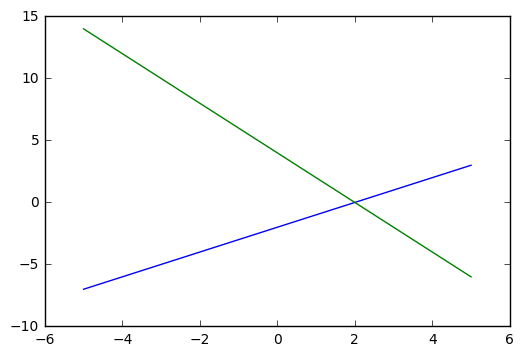

In [328]:
plt.plot(xs, y1)
plt.plot(xs, y2)
plt.show()

In [329]:
intersection = np.cross(line1, line2)
print(intersection)
print(intersection * 8)

[ 0.25   0.     0.125]
[ 2.  0.  1.]


### Parallel Lines and Ideal Points

One of the major advantages of homogeneous coordinates is that, points at infinity are treated as ordinary points.  This allows us to express the intersection of parallel lines just as we would express the intersection of other lines.

Consider
$$y = 2x - 1 \implies -2x + y + 1 = 0$$
$$y = 2x + 1 \implies 2x + -y + 1 = 0$$

In [331]:
line1 = np.array([-2, 1, 1])
line2 = np.array([2, -1, 1])

In [332]:
xs = np.array([-5, 5])
y1 = 2 * xs - 1
y2 = 2 * xs + 1

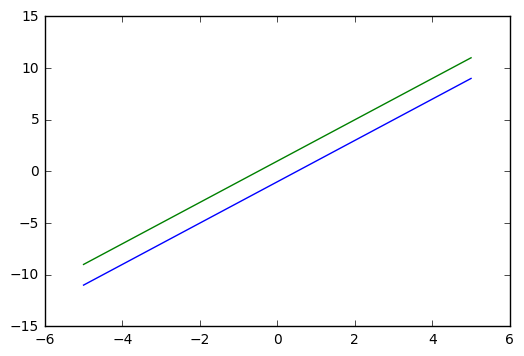

In [333]:
plt.plot(xs, y1)
plt.plot(xs, y2)
plt.show()

In [335]:
intersection = np.cross(line1, line2)
print(intersection)

[2 4 0]


Consider
$$x = -1 \implies x + 0*y + 1 = 0$$
$$x = 3 \implies \frac{-1}{3}x + 0*y + 1 = 0$$

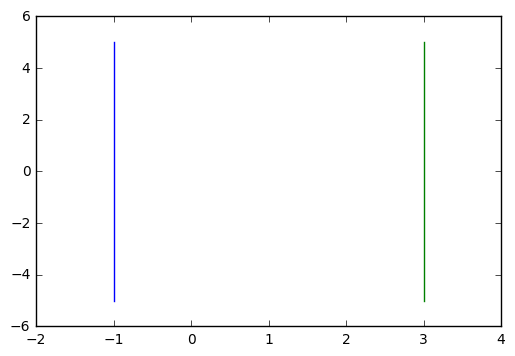

In [349]:
line1 = np.array([1, 0, 1])
line2 = np.array([-1./3, 0, 1])
ys = np.array([-5, 5])
x1 = np.zeros_like(ys) - 1
x2 = np.zeros_like(y2) + 3
plt.scatter(x1,ys,s=0)
plt.plot(x1, ys)
plt.plot(x2, ys)
plt.show()

In [351]:
intersection = np.cross(line1, line2)

In [354]:
print(intersection)
print(intersection / np.linalg.norm(intersection))

[ 0.         -1.33333333  0.        ]
[ 0. -1.  0.]


When the last value is 0, the point is said to exist at infinity (or equivalent on the line at infinity).  In this case, the intersection is at infinity in the y direciton.  Points with a 0 as the last coordinate are called *ideal* points.  The line at infinity is written as [0:0:1].  Homogeneous coordinates allow us to provide a point at which two lines intersect without treating it as a special case.